In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class OnlineCovariance:
    def __init__(self):
        self.N = 0.0
        self.mean_x = 0.0
        self.mean_y = 0.0
        self.sum_of_squares = 0.0
        self.cov = 0.0
    
    def process(self, X_N_plus_1, Y_N_plus_1):
        self.mean_x = (self.N * self.mean_x + X_N_plus_1) / (self.N + 1)        
        self.mean_y = (self.N * self.mean_y + Y_N_plus_1) / (self.N + 1)
        self.N += 1
        self.sum_of_squares += X_N_plus_1 * Y_N_plus_1
        self.cov = self.sum_of_squares / self.N - self.mean_x * self.mean_y
        return self.cov

In [5]:
class OnlineLR:
    def __init__(self):
        self.cov_x_y = OnlineCovariance()
        self.var_x = OnlineCovariance()
    
    def process(self, x, y):
        self.cov_x_y.process(x, y)
        self.var_x.process(x, x)
    
    def getSlope(self):
        return self.cov_x_y.cov / self.var_x.cov

/Users/jason.xie/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


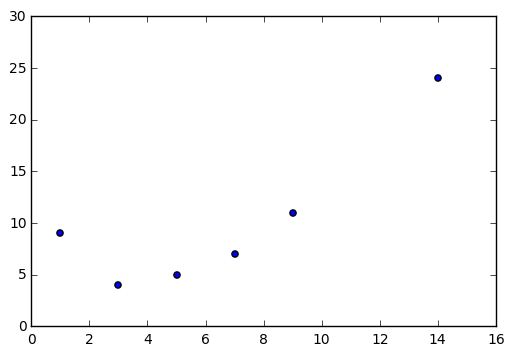

In [7]:
x = np.array([1,3,5,7,9,14])
y = np.array([9,4,5,7,11,24])

plt.scatter(x, y)

In [8]:
t = OnlineLR()

for my_x, my_y in zip(x, y):
    t.process(my_x, my_y)

print t.getSlope()

1.3023255814
